In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import stats as st
from scipy.stats import sem, ttest_ind

In [2]:
# Read in data
general_heights = pd.read_csv("general_heights.csv", header=None)
cba_data = pd.read_csv("wba_data.csv", header=None)
cba_data

hold = cba_data
hold.drop(hold.head(1).index, inplace=True)
hold
cba_mean = st.mean(pd.to_numeric(hold[3]))
cba_sem = sem(pd.to_numeric(hold[3]))


hold2 = general_heights
hold2.drop(hold2.head(1).index, inplace=True)
general_heights_mean = st.mean(pd.to_numeric(hold2[0]))
general_heights_sem = sem(pd.to_numeric(hold2[0]))


print(cba_mean)
print(general_heights_mean)

72.32
64.68416666666667


In [3]:
# Run the t/-test
heights1 = pd.to_numeric(hold[3])
heights2 = pd.to_numeric(hold2[0])
(t_stat, p) = ttest_ind(heights1, heights2, equal_var=False)


In [4]:
# Report the data
if p < 0.05:
    print("The differences between the heights are significant.")
else:
    print("The differences between heights are due to chance.")

The differences between the heights are significant.


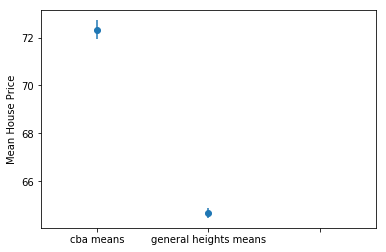

In [5]:
# Plot sample means with error bars
means = [cba_mean, general_heights_mean]
sems = [cba_sem, general_heights_sem]
labels = ["cba means", "general heights means"]

fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2])

ax.set_ylabel("Mean House Price")

plt.show()

In [6]:
# Plot mean height of players